# Clasificación con Regresión Logística

Dependencias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

Cargar datos

In [ ]:
# Cargar datos
df = pd.read_csv('../../datasets/churn/churn_data.csv')

1. Análisis de datos

In [3]:
print("Resumen estadístico:")
print(df.describe(include='all'))

print("\nValores nulos por columna:")
print(df.isnull().sum())

Resumen estadístico:
          country      city           name  signupDate lastLoginDate  \
count      200000    200000         200000      200000        200000   
unique         30       440         120324        1095          1088   
top     Indonesia  San Juan  Michael Smith  2022-06-25    2025-05-02   
freq         6839       925             86         223          1215   
mean          NaN       NaN            NaN         NaN           NaN   
std           NaN       NaN            NaN         NaN           NaN   
min           NaN       NaN            NaN         NaN           NaN   
25%           NaN       NaN            NaN         NaN           NaN   
50%           NaN       NaN            NaN         NaN           NaN   
75%           NaN       NaN            NaN         NaN           NaN   
max           NaN       NaN            NaN         NaN           NaN   

        subscriptionType  usageFrequency  watchTimePerWeek  preferredDevice  \
count      200000.000000   200000.0

Gráficos

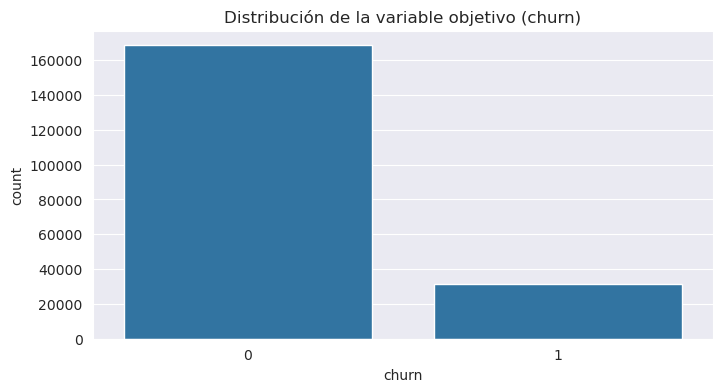

In [4]:
# Gráficos básicos
plt.figure(figsize=(8, 4))
sns.countplot(x='churn', data=df)
plt.title("Distribución de la variable objetivo (churn)")
plt.show()

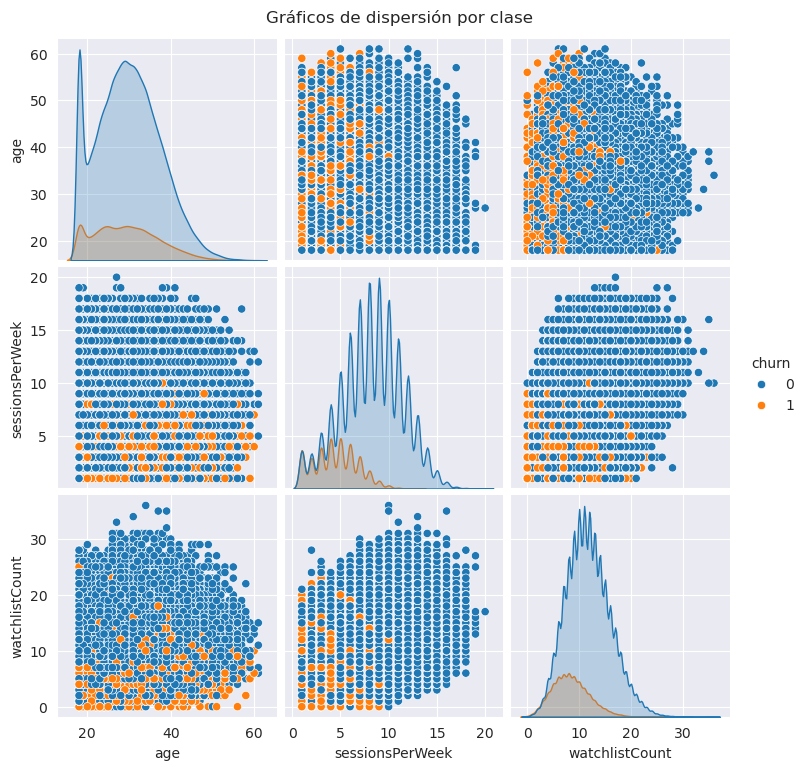

In [5]:
sns.pairplot(df[["age", "sessionsPerWeek", "watchlistCount", "churn"]], hue='churn')
plt.suptitle("Gráficos de dispersión por clase", y=1.02)
plt.show()

2. Limpieza de datos

Eliminar columnas irrelevantes

In [6]:
cols_to_drop = ['name', 'country', 'city', 'signupDate', 'lastLoginDate', 'gender']
df.drop(columns=cols_to_drop, inplace=True)

Eliminar duplicados si existen

In [7]:
df = df.drop_duplicates()

Llenar o eliminar valores nulos (según contexto)

In [8]:
df = df.dropna()  # Para simplicidad, eliminamos registros con nulos

3. Transformación de variables

In [9]:
numeric_features = ['watchTimePerWeek', 'satisfactionScore', 'age',
                    'sessionsPerWeek', 'watchlistCount']
categorical_features = [col for col in df.columns
                        if df[col].dtype == 'object' or col in [
                            'subscriptionType', 'usageFrequency',
                            'preferredDevice', 'customerSupportRating',
                            'preferredCategory', 'multiDeviceUser', 'hasKidsProfile',
                            'lastWatchedCategory', 'timeOfUse', 'notificationsEnabled'
                        ] and col != 'churn']

# Preprocesador
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

Separar variable objetivo

In [10]:

X = df.drop(columns='churn')
y = df['churn']

In [11]:
X

,subscriptionType,usageFrequency,watchTimePerWeek,preferredDevice,customerSupportRating,satisfactionScore,age,preferredCategory,sessionsPerWeek,multiDeviceUser,hasKidsProfile,lastWatchedCategory,timeOfUse,notificationsEnabled,watchlistCount
0,2,4,31.7,2,3,7.9,28,Action,11,1,1,Action,1,1,20
1,1,2,18.9,1,3,4.6,36,Kids,2,1,1,Action,4,1,9
2,2,2,17.3,1,4,8.3,25,Horror,5,1,0,Horror,2,1,6
3,2,3,23.3,1,5,10.0,44,Sci-Fi,9,0,0,Sci-Fi,1,1,18
4,1,1,14.8,1,3,7.1,36,Documentary,1,1,1,Sci-Fi,3,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2,3,30.0,1,2,4.4,31,Horror,8,1,0,Comedy,3,1,9
199996,3,3,26.4,1,3,5.0,33,Action,11,0,1,Sci-Fi,4,1,15
199997,3,4,31.8,1,1,7.5,18,Action,14,1,0,Action,2,1,12
199998,3,4,25.4,2,1,3.1,33,Western,12,0,0,Western,1,1,18


In [12]:
y

0         0
1         1
2         0
3         0
4         0
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: churn, Length: 200000, dtype: int64

4. División de datos y entrenamiento

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Pipeline

In [14]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [15]:
X_train

,subscriptionType,usageFrequency,watchTimePerWeek,preferredDevice,customerSupportRating,satisfactionScore,age,preferredCategory,sessionsPerWeek,multiDeviceUser,hasKidsProfile,lastWatchedCategory,timeOfUse,notificationsEnabled,watchlistCount
182456,3,1,18.0,1,3,5.8,28,Action,1,0,1,Horror,3,1,10
140042,3,4,28.6,1,3,7.7,35,Comedy,10,1,0,Comedy,4,1,20
167746,2,3,24.5,1,2,6.5,30,Drama,10,0,1,Drama,1,1,13
174923,1,3,21.8,1,3,7.3,23,Romance,8,0,0,Comedy,3,1,10
170979,3,3,30.1,1,4,8.2,33,Western,10,1,1,Western,4,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192224,1,2,10.9,2,3,5.2,48,Romance,6,0,0,Romance,2,1,7
57334,2,3,22.2,3,1,5.5,42,Kids,6,0,0,Kids,2,1,13
121332,3,3,23.8,1,1,3.4,24,Comedy,5,1,0,Comedy,2,1,15
11932,2,2,13.7,2,1,1.7,38,Sci-Fi,6,0,1,Sci-Fi,1,1,7


Ajustar el modelo

In [16]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['watchTimePerWeek',
                                                   'satisfactionScore', 'age',
                                                   'sessionsPerWeek',
                                                   'watchlistCount']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['subscriptionType',
                                                   'usageFrequency',
                                                   'preferredDevice',
                                                   'customerSupportRating',
                                                   'preferredCategory',
                                                   'multiDeviceUser',
                                                   'hasKidsProfile',
                                                   'lastWatchedCategory',
                                                   'timeOfUse',
                                                   'notificationsEnabled'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [17]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33691
           1       1.00      1.00      1.00      6309

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

Confusion Matrix:
[[33686     5]
 [    0  6309]]
ROC AUC Score: 0.9999848604972684


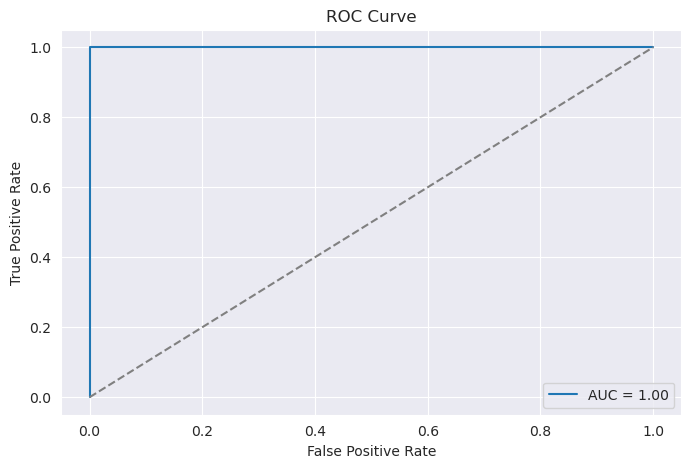

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()